In [ ]:
# Autosaves this file every 60 seconds
%autosave 60

Autosaving every 60 seconds


In [ ]:
# Asks user to import csv file
from google.colab import files
uploaded = files.upload()

Saving winequality.csv to winequality.csv


# Laboratory Session 2 -- Assignment

To be delivered until 2022-12-16 23:59:59.

## Section 1 -- Linear Regression

**1.** Consider a dataset with 100 observations, containing a single predictor and a quantitative response. Two different models are fitted to the data, a linear regression ($m_1: Y = \beta_0 + \beta_1 X + \epsilon$) and a cubic regression ($m_2: Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$).

**1.a)** Suppose that the actual relation between X and Y is linear. Can the **training** residual sum of squares (RSS) of the linear model be expected to be smaller, larger or equal to the one from the cubic model? Or is there no information to tell? Justify your answer.

The training RSS of the linear model is equal to the one from the cubic model because a model using cubic regression will always have an equal or better fit than a linear model for the training dataset, resulting in equal RSS values.


**1.b)** Answer question 1.a) considering the test RSS rather than the training RSS.

The linear regression model will have a lower RSS than the one from the cubic model because we know that the relation between X and Y is in fact linear. Because the data now is not the data used for training the models, the cubic one will have a poorer performance when compared to the linear model.

**1.c)** Suppose that the actual relationship between X and Y is not linear, but it is not known how far it is from being linear. What is it expected of the the **training** RSS for the linear compared with the cubic models? Or is there not enough information? Justify your answer.

The cubic model is of higher order, which gives it greater flexibility to adapt to the training data set, and thus provides a better fit to the training data than the linear regression model. Because of that, the RSS value will be higher for the linear model for non-linear training data.

**1.d)** Answer question 1.c) considering the test RSS rather than the training RSS.

The similarity between the test data set and the training data set will dictate which model will present the lower test RSS values. If both data sets have a similar behavior, then the cubic model will have a lower test RSS because the it was already trained with a data set that doesn't differ much when it comes to its behavior. If the test data set is different from the training data set, the cubic model will perform worse because it will be overfitted to the training data set, which is not represented well by the test data set and the linear model may have a lower RSS value.

**2.a)** Load the dataset "wine.csv". Do not change the dataset file.

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import random
import scipy


In [ ]:
# Reads the data from the .csv file
wine_data = pd.read_csv('winequality.csv',';')

# Returns the first five rows of the data set
wine_data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


**2.b)** Encode the feature "type".

In [ ]:
# Reads 'type' column 
wine_data.type = wine_data.type.astype(str)

# Attributes value 1 if the wine is red and value 0 if is white
for i in range(len(wine_data.type)):
  if wine_data.type[i] == 'red':
    wine_data.type[i] = 1
  else:
    wine_data.type[i] = 0
    

<ipython-input-6-cc99cbb9e5bc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data.type[i] = 1
<ipython-input-6-cc99cbb9e5bc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data.type[i] = 0


**2.c)** Perform a simple linear regression considering *quality* as the response and *pH* as the predictor. Given the results, comment on the following statements:

In [ ]:
# Import 'LinearRegression' function from sklearn library
from sklearn.linear_model import LinearRegression

# Puts 'ph' and 'quality' parameters into column arrays
X = wine_data['pH'].values.reshape(-1, 1)
y = wine_data['quality'].values.reshape(-1, 1)

# Initialize the model as a LinearRegression() function, and fit the data to it
regr = LinearRegression()
regr.fit(X, y)


LinearRegression()

    i) Are the predictor and response statistically related?

In [ ]:
# Import 'pearsonr' function from scipy library
from scipy.stats import pearsonr

# Computes pairwise correlation of columns for wine data
wine_data_corrs = wine_data.corr()

# With function from the library obtain pvalue and print
pvals = wine_data.corr(method=lambda x,y: pearsonr(x,y)[1])
pval_quality_pH = pvals['quality']['pH']
pval_quality_pH


0.11593102710343497

The p-value is higher than 0.05 which indicates they are not statistically related.

    ii) How strong is the relationship between predictor and response? (*Hint: comment on the R^2 score of the model*)

In [ ]:
# Import 'r2_score' function from sklearn library
from sklearn.metrics import r2_score

# Regression for the data
quality_pred = regr.predict(X)

# Calculates r2 value for the fit and prints it
r2_value = r2_score(y, quality_pred)
print('R^2: {:.4f}'.format(r2_value))


R^2: 0.0004


The closer to 1 R^2 is, the better suited is the predictor to the response. Our calculated R^2 value is almost null, so the relationship between the predictor and the response is almost non-existent.





    iii) Is the relationship between the predictor and response positive or negative?

In [ ]:
# Print the interception and coefficient
print('quality = {:.4f} + {:.4f} * pH'.format(regr.intercept_[0], regr.coef_[0][0]))

quality = 5.4774 + 0.1059 * pH


The coefficient calculated from the simple linear regression is positive, so the predictor and response have a positive relationship (the quality increases as pH increases).

    iv) What is the predicted value of quality when the pH is 9?

In [ ]:
# Calculate quality value for ph=9 and print it
quality_pH9 = regr.intercept_[0] + regr.coef_[0][0] * 9
print('quality(pH=9) = {:.4f}'.format(quality_pH9))

quality(pH=9) = 6.4309


**2.d)** Plot a scatter plot of the response and predictor, along with the regression line.

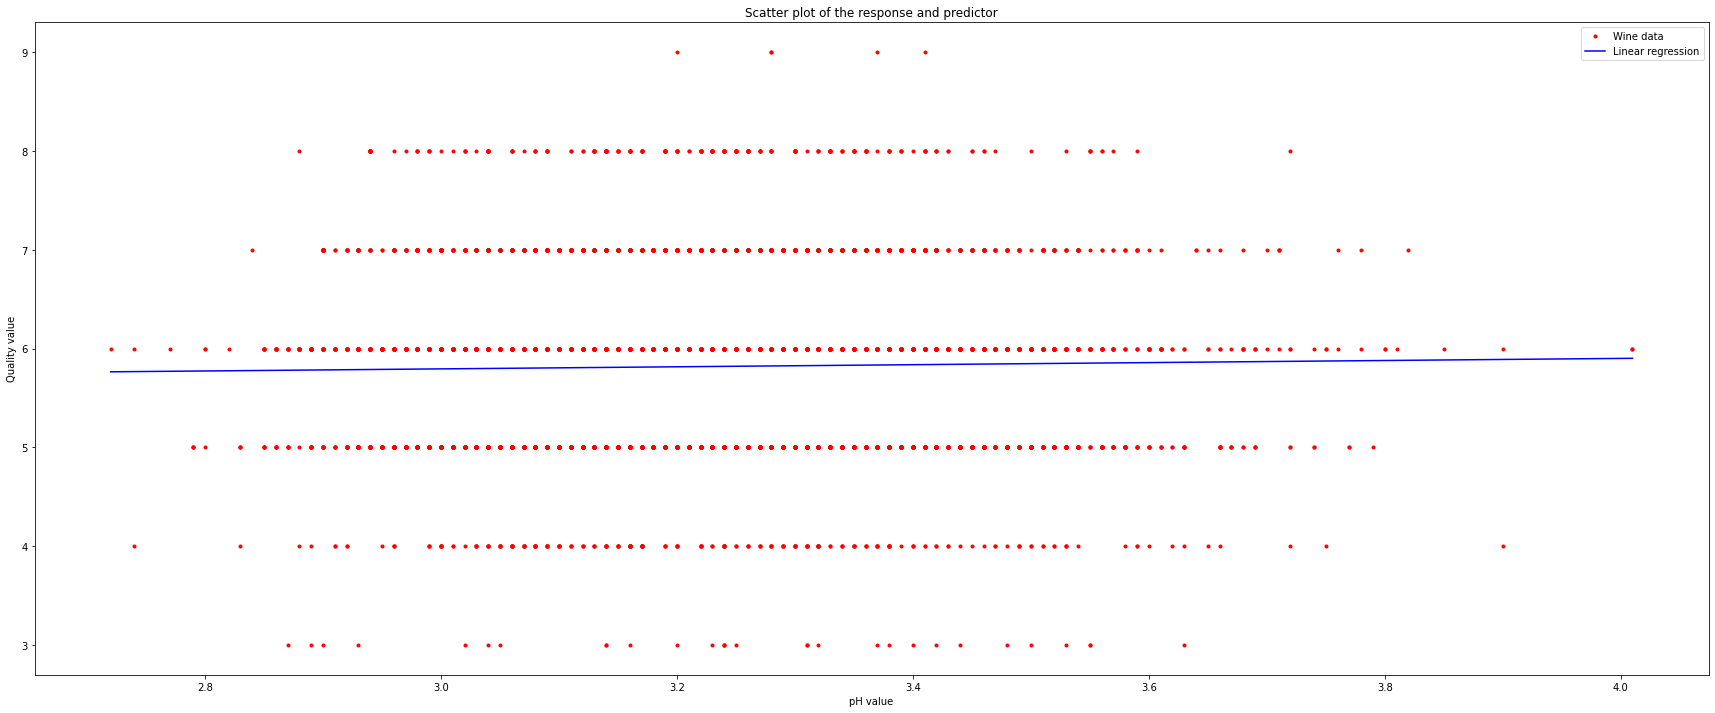

In [ ]:
# Calculates maximum and minimal pH values 
limits_pH = np.array([min(X), max(X)])
quality_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_pH

# Plots the data and the linear regression
plt.rcParams['figure.figsize'] = [30, 12]
plt.plot(wine_data['pH'], wine_data['quality'], '.r')
plt.plot(limits_pH, quality_vals, 'b-')
plt.title('Scatter plot of the response and predictor')
plt.xlabel("pH value")
plt.ylabel("Quality value")
plt.legend(['Wine data','Linear regression'])
plt.show()


## Section 2 -- Classification

**3)** Suppose that a dataset is divided into two equally-sized training and test sets, and then try out two different classification procedures:

* The first is the logistic regression, obtaining an error rate of 20% on the training data and 30% on the test data.
* The second is a 1-nearest neighbors, with an average error rate (averaged over test and training datasets) of 18%.

Based on these results, which method is preferred for classifying new observations? Why?

On the second method, KNN (K = 1), the training error will always be null because if the model is choosing a single nearest neighbor from the training data set (which was used to train the model) then when performing the error calculation, it will be comparing values from the training data set with themselves, resulting in the null error. Therefore, the error on the test data set for the 1-nearest neighbor will be 36% (2 x 18%), which is higher than the 30% error rate of the logistic regression on the test data. For that reason, the logistic regression method is preferred for classifying new observations.

**4.a)** Create a new column, "quality7", that contains a 1 if quality contains a value equal or above 7, and a 0 if quality contains a value below 7. Drop the original column "quality".

In [ ]:
# Create column 'quality7' and assign it 1 or 0 depending on quality
wine_data["quality7"] = 0  

for i in range(len(wine_data.quality)):
  if wine_data.quality[i] >= 7:
    wine_data.quality7[i] = 1

# Drop previous 'quality' column
wine_data.drop(['quality'], inplace=True, axis=1)


<ipython-input-13-ed7fac902c79>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data.quality7[i] = 1


**4.b)** Do a correlation matrix plot between all the columns to evaluate which features are linearly correlated. Consider a statistical significance of 0.1%. Describe your findings, with a focus on evaluating which features are most related with "quality7".

Text(0.5, 1.0, 'Correlation matrix for wine data')

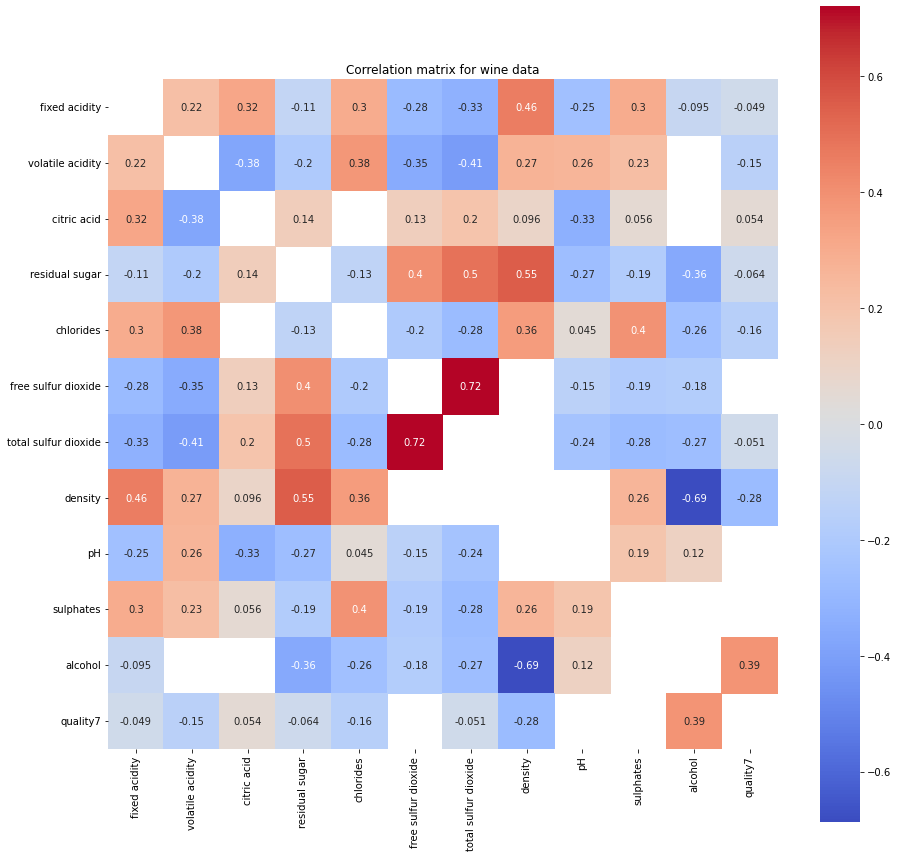

In [ ]:
## Calculate the correlations between the columns
wine_data_corrs = wine_data.corr(method='pearson')

# Calculate the p-value, as the second element of the response from the pearsonr function. 
pval = wine_data.corr(method=lambda x, y: pearsonr(x, y)[1])

## Establish the mask, to hide values without a given statistical significance
ptg_stat_sig = 0.1/100
mask = pval > ptg_stat_sig

## Plot the correlation matrix using seaborn's heatmap function
plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(wine_data_corrs, mask = mask, square = True, cmap = 'coolwarm', annot = True)
plt.title('Correlation matrix for wine data')


Observing the correlation matrix, we can conclude that there is a strong correlation between the free and total sulfur dioxide in the wine. This is obvious because if the free sulfur dioxide rises, being one of the types of sulfur dioxides present in the wine, the total will also increase. Also, there is a strong negative correlation between the density and the alcohol quantity. The main component of the wine is water, and since alcohol is less dense that water, if the alcohol quantity rises, the density of the wine will decrease. Analyzing the "quality7", there is almost no correlation with the other variables, with the exception of "alcohol". Apparently, if the wine has a superior alcohol quantity, there is more probability of its quality being equal or above seven.

**4.c)** Create the inputs as all the predictors and outputs as the "quality7" feature. Split the data into test and training datasets. Consider a test dataset comprised of 30% of the whole dataset.

In [33]:
# Import 'sample' function from random library
from random import sample

# Gets and print column variable names
wine_data.columns.tolist()
print(wine_data.columns.tolist)

# Establish the idxs of each test and train datasets
test_size = 0.3                 # Ratio of test dataset
seed = 100                      # Random seed
random.seed(seed)               # Apply random seed
idxs_test = sample(range(wine_data.shape[0]), int(test_size * wine_data.shape[0]))  # Sample idxs for test datasets
idxs_train = [i for i in range(wine_data.shape[0]) if i not in idxs_test]           # Obtain the remaining idxs as training

# Create the train and test datasets
wine_data_train = wine_data.iloc[idxs_train,:].copy()
wine_data_test = wine_data.iloc[idxs_test,:].copy()

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']

X_train = wine_data_train[features].values
y_train = wine_data_train['quality7'].values
X_test = wine_data_test[features].values
y_test = wine_data_test['quality7'].values


<bound method IndexOpsMixin.tolist of Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'quality7'],
      dtype='object')>


**4.d)** Perform LDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [ ]:
# Import various functions from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Create the model and fit the data to it
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = model_LDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(25))
print ('{}  |  {}'.format('0'.rjust(20),'1'))
print ('{}:  {} |  {}'.format('Predicted 0'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}   |  {}'.format('Predicted 1'.rjust(14), cm[0,1], cm[1,1]))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(model_LDA.classes_)) if model_LDA.classes_[i] == 1]
y_LDA_pred = model_LDA.predict_proba(X_test)[:,cols_to_store]
y_LDA_true = (y_test.copy() == 1).copy()

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))



                   Actual
                   0  |  1
   Predicted 0:  1484 |  259
   Predicted 1:  96   |  110

Success Rate: 81.79%
Error Rate: 18.21%


**4.e)** Perform QDA on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [ ]:
# Create the model and fit the data to it
model_QDA = QuadraticDiscriminantAnalysis()
model_QDA.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = model_QDA.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(25))
print ('{}  |  {}'.format('0'.rjust(20),'1'))
print ('{}:  {} |  {}'.format('Predicted 0'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}  |  {}'.format('Predicted 1'.rjust(14), cm[0,1], cm[1,1]))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(model_QDA.classes_)) if model_QDA.classes_[i] == 1]
y_QDA_pred = model_QDA.predict_proba(X_test)[:,cols_to_store]
y_QDA_true = (y_test.copy() == 1).copy()

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))




                   Actual
                   0  |  1
   Predicted 0:  1161 |  106
   Predicted 1:  419  |  263

Success Rate: 73.06%
Error Rate: 26.94%


**4.f)** Perform logistic regression on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [37]:
# Import 'LogisticRegression' function from sklearn library
from sklearn.linear_model import LogisticRegression

# Create the model and fit the data to it
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = model_logistic.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(25))
print ('{}  |  {}'.format('0'.rjust(20),'1'))
print ('{}:  {} |  {}'.format('Predicted 0'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}   |  {}'.format('Predicted 1'.rjust(14), cm[0,1], cm[1,1]))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(model_logistic.classes_)) if model_logistic.classes_[i] == 1]
y_logistic_pred = model_logistic.predict_proba(X_test)[:,cols_to_store]
y_logistic_true = (y_test.copy() == 1).copy()

# Print test error of the model
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))




                   Actual
                   0  |  1
   Predicted 0:  1518 |  299
   Predicted 1:  62   |  70

Success Rate: 81.48%
Error Rate: 18.52%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**4.g)** Perform naive Bayes on the training data in order to predict "quality7" using the remaining variables. What is the test error of the model obtained?

In [ ]:
# Import 'GaussianNB' function from sklearn library
from sklearn.naive_bayes import GaussianNB

# Create the model and fit the data to it
model_nB = GaussianNB()
model_nB.fit(X_train, y_train)

# Predict the classification and print the confusion matrix
y_pred = model_nB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print ('\n' + 'Actual'.rjust(25))
print ('{}  |  {}'.format('0'.rjust(20),'1'))
print ('{}:  {} |  {}'.format('Predicted 0'.rjust(14), cm[0,0], cm[1,0]))
print ('{}:  {}  |  {}'.format('Predicted 1'.rjust(14), cm[0,1], cm[1,1]))

# Store the necessary variables for ROC/AUC
cols_to_store = [i for i in range(len(model_nB.classes_)) if model_nB.classes_[i] == 1]
y_nB_pred = model_nB.predict_proba(X_test)[:,cols_to_store]
y_nB_true = (y_test.copy() == 1).copy()

# Print success rate
print('\nSuccess Rate: {:.2f}%'.format(accuracy_score(y_pred, y_test)*100))
print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))




                   Actual
                   0  |  1
   Predicted 0:  1152 |  136
   Predicted 1:  428  |  233

Success Rate: 71.06%
Error Rate: 28.94%


**4.h)** Perform KNN on the training data, with several values of K, in order to predict "quality7" using the remaining variables. What test errors are obtained? Which value of K seems to perform the best on this data set?

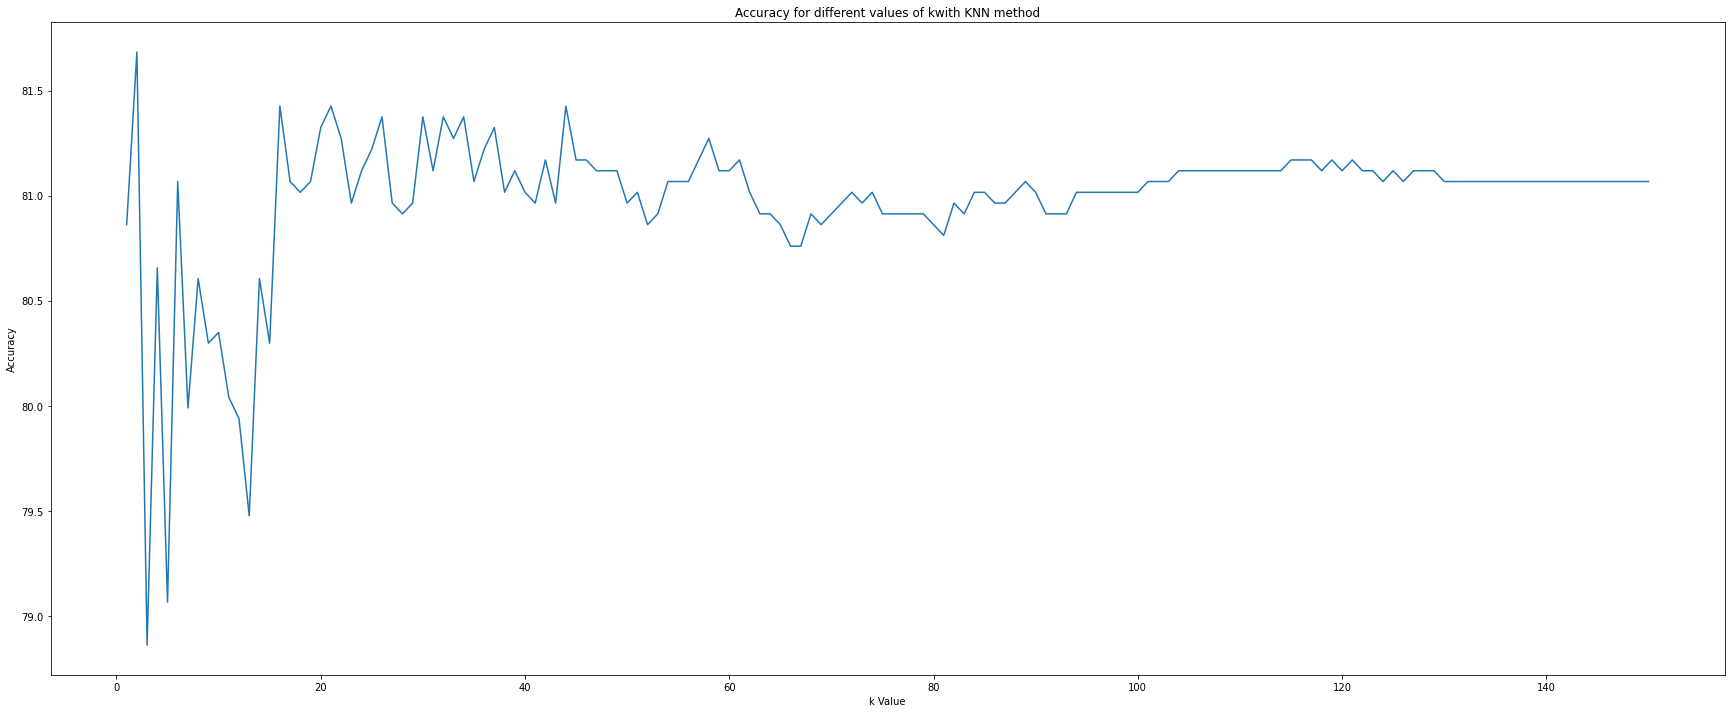


                   Actual
                   0   |  1
   Predicted 0:  1486  |  263
   Predicted 1:  94    |  106

Success Rate: 81.68%
Error Rate: 18.32%


In [ ]:
def KNN_fit(X_train, X_test, y_train, y_test, n_neighbors, verbosity=0):

    # Import 'KNeighborsClassifier' function from sklearn library
    from sklearn.neighbors import KNeighborsClassifier

    # Create the model and fit the data to it
    model_KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
    model_KNN.fit(X_train, y_train)

    # Predict the classification and print the confusion matrix
    y_pred = model_KNN.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy_val = accuracy_score(y_pred, y_test)*100
    
    if verbosity == 1:
        print ('\n' + 'Actual'.rjust(25))
        print ('{}   |  {}'.format('0'.rjust(20),'1'))
        print ('{}:  {}  |  {}'.format('Predicted 0'.rjust(14), cm[0,0], cm[1,0]))
        print ('{}:  {}    |  {}'.format('Predicted 1'.rjust(14), cm[0,1], cm[1,1]))
        # Print success rate
        print('\nSuccess Rate: {:.2f}%'.format(accuracy_val))
        print('Error Rate: {:.2f}%'.format((1-accuracy_score(y_test, y_pred))*100))


    return model_KNN, accuracy_val

# Initialize a list to store the accuracies
accuracies = []
knn_limit = 150

# Access the custom created KNN function to calculate the accuracy for each number of neighbors
for i in range(knn_limit):
    _, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=i+1, verbosity=0)
    accuracies.append(accuracy_val)

# Plot the results
plt.subplots(figsize=(30, 12))
plt.plot([i+1 for i in range(knn_limit)], accuracies)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of kwith KNN method')
plt.show()

# Find best K value for KNN model
max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy)+1

# Store the necessary variables for ROC/AUC
model_KNN, accuracy_val = KNN_fit(X_train, X_test, y_train, y_test, n_neighbors=max_index, verbosity=1)
cols_to_store = [i for i in range(len(model_KNN.classes_)) if model_KNN.classes_[i] == 1]
y_KNN_pred = model_KNN.predict_proba(X_test)[:,cols_to_store]
y_KNN_true = (y_test.copy() == 1).copy()


The best K value for this data set is 2. The confusion matrix and success rate presented below are relative to the KNN model which takes into account K = 2


**4.i)** Calculate the area under curve (AUC) for the LDA, QDA, logistic regression, naive Bayes and for the best value of K for the KNN method. Compare the results.

In [ ]:
# Print scores of Area under curve (AUC)
print('AUC'.rjust(25))
print('{}: {:.3f}'.format('Logistic Regression'.rjust(19), roc_auc_score(y_logistic_true, y_logistic_pred)))
print('{}: {:.3f}'.format('LDA'.rjust(19), roc_auc_score(y_LDA_true, y_LDA_pred)))
print('{}: {:.3f}'.format('QDA'.rjust(19), roc_auc_score(y_QDA_true, y_QDA_pred)))
print('{}: {:.3f}'.format('Naive Bayes'.rjust(19), roc_auc_score(y_nB_true, y_nB_pred)))
print('{}: {:.3f}'.format('KNN (k=2)'.rjust(19), roc_auc_score(y_KNN_true, y_KNN_pred)))

                      AUC
Logistic Regression: 0.787
                LDA: 0.806
                QDA: 0.807
        Naive Bayes: 0.736
          KNN (k=2): 0.727


By looking at the area under the curve (AUC) calculations for the 5 different models used, we can conclude that theywere not too bad. This can be seen by the fact that all the values are above 0.7. Still a bit far away from the result of an ideal model (which would have to be 1) but satisfactory enough. The worst model is for the KNN wit (k=2), having a AUC of 0.727 and the best model is the QDA having a AUC of 0.807. 

These values are considered to be acceptable as they provide some level of accuracy when predicting whether or not the wine quality is higher or lower than 7 and these models perform better than purely random guessing.
Additionally, we can make the assumption that using LDA or QDA will provide a significantly higher performance than the other methods (especially the Gaussian naive Bayes and the KNN models).

**4.j)** Plot the ROC curves for the 5 methods. Compare the results.

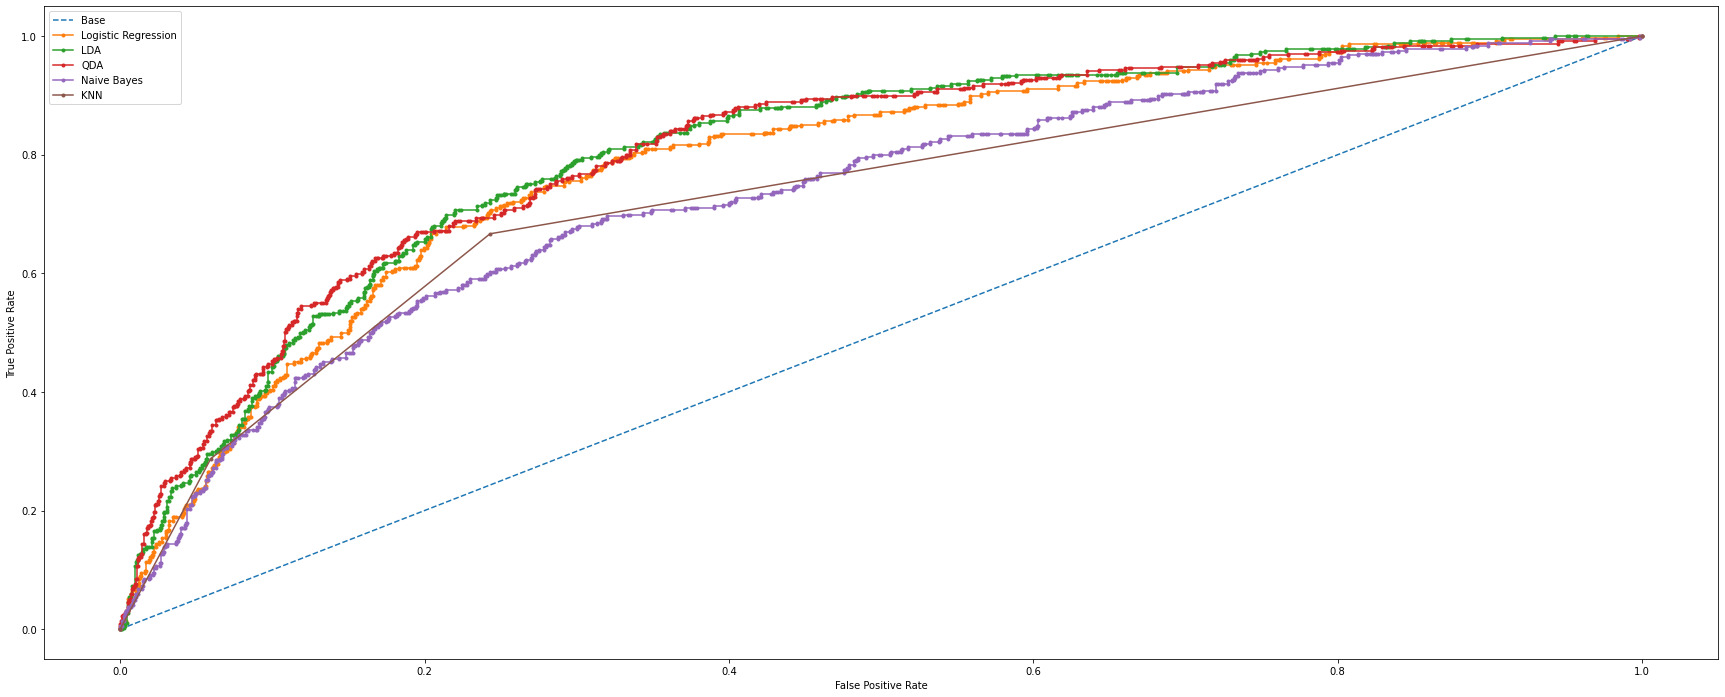

In [ ]:
# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_logistic_true, y_logistic_pred)
lr_fpr1, lr_tpr1, _ = roc_curve(y_LDA_true, y_LDA_pred)
lr_fpr2, lr_tpr2, _ = roc_curve(y_QDA_true, y_QDA_pred)
lr_fpr3, lr_tpr3, _ = roc_curve(y_nB_true, y_nB_pred)
lr_fpr4, lr_tpr4, _ = roc_curve(y_KNN_true, y_KNN_pred)

# Plot the ROC curve for the models
plt.subplots(figsize=(30, 12))
plt.plot([0,1], [0,1], linestyle='--', label = 'Base')
plt.plot(lr_fpr, lr_tpr, marker='.', label = 'Logistic Regression')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label = 'LDA')
plt.plot(lr_fpr2, lr_tpr2, marker='.', label = 'QDA')
plt.plot(lr_fpr3, lr_tpr3, marker='.', label = 'Naive Bayes')
plt.plot(lr_fpr4, lr_tpr4, marker='.', label = 'KNN')

# Axis Labels
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Looking at the ROC curve we can visually see what was stated before: the five models compared offer an acceptable performance (better than randomly guessing the outcome, but still with a non residual error rate). Again, the Gaussian naive Bayes and the KNN models perform significantly worse than the other three and without calculating the AUCs, the logistic regression, LDA and QDA are the models that perform the best at predicting if the wine quality is higher or lower than 7.

It is important to mention that, although the fitting is acceptable it is not incredibily good. A perfect model would have a 0 false positive rate and 1 true positive rate. Which would corresponde to a vertical line at 0 in the x axis and then a horizontal line at 1 in the vertical axis. As we can see, even the better models are still a bit far away from this ideal situation. As such the model can be used but one should be aware of its limitations.

## Section 3 -- Bootstrap and k-Fold

**5.a)** Explain how the leave-one-out cross validation (LOOCV) is implemented.

In the Leave-one-out cross-validation (LOOCV), we start by dividing our dataset into two: training and testing.  We train the model on all the data points except for one , and then test that same model on the data point which was left out. This procedure is repeated for every data point in the dataset, resulting in a separate model being trained and tested for each data point.


For each point in the training set, a model is fitted and used to predict the value of the left out data point. Then the error between this value and the true value of the left out data point is computed. Finally, the average error across all the iterations will give us an estimate of the model's generalization error, a measure of how well the model will perform on unseen data.

Since this process is done for each data point, this can be a very time-consuming method. However, it is a reliable method for evaluating the performance of a model because it uses all the data, which helps to reduce the variance of the estimate of the model's generalization error.

**5.b)** What are the advantages and disadvantages of k-Fold cross-validation relative to:

1. Validation set approach.
2. Leave One Out Cross-Validation (LOOCV)

All of these methods are resampling methods used to evaluate the performance of models and have its advantages and disadvantages. The LOOCV can even be considered as a special/specific case of K-fold cross-validation where k = n. The K-fold method divides the datasets into folds (partitions of the dataset), training the model on some of those folds and testing it on a different one. The process is repeated a number of times, with each fold serving as the testing set once. The performance estimate is then calculated by averaging the calculation of each fold.

Below, the advantanges and disadvantages of this method in comparison to other two will be presented :

**Validation set apporach:**

K-fold cross-validation gives a more robust estimate of model performance (uses all the data points in the dataset to evaluate the model's performance), it is more accurate. It is also less sensitive to the choice of training/testing split. However, the k-fold cross validation requires training and evaluating the model k times, which can be computationally expensive if k is large and the model is complex.

**Leave One Out Cross-Validation(LOOCV):**

The LOOCV resampling method uses all the data points in the dataset to evaluate the model's performance, which makes it a very reliable method for estimating the model's generalization error. However, it can lead to even greater computational times than the K-fold cross-validation method as it requires training and evaluating the model n times, where n is the size of the dataset. This can be computationally expensive if the dataset is large and the model is complex. The LOOCV can be very sensitive to noise or outliers in the data which result in a high variance in the estimate of the model's generalization error.

## Section 4 -- Other Questions

**6)** In your group's option, what are the advantages and disadvantages of using a virtual environment when programming in Python?

There are several advantages to using a virtual environment when programming in Python. Some of them are presented below:

**Advantages:**
By using a virtual environment we are able to isolate different Python environments on a single machine. This ensures that package installation or updates for one project do not affect the packages used in another project. Virtual environments allow us to reproduce fairly easily the exact Python environment that was used in a given project. 

Not only this, but they provide a way to manage packages for a specific project with no repercussions on the packages of the global environment, making our life easier in managing dependencies and avoiding conflicts conflicts.

This is useful when sharing your code with others, as it ensures that the code will run in the same environment as it did when it was developed, making it an ideal choice for complex projects where many people are involved

**Disadvantages:**

As for the disadvantages, using virtual environments requires additional setup and configuration (adds complexity), which can be time-consuming and may not be necessary for small projects. The other major downside is the fact that they depend on external tools such as *venv* or *conda*.

All in all, using it or not very much depends on the scope and type of project at question. Whilst for more complex projects the advantages of using a virtual environment are obvious, for smaller projects, the addition of complexity may not be worth it.

**7)** In your group's opinion, in what circumstances is it better to use Jupyter Notebooks and when is it better to use Google Colab notebooks? Give some specific examples.

Once again, both Jupyter notebooks and Google Colab have its advantages and disadvantages. Which to use depends on the situation but both are useful tools for data analysis and scientific computing.

Jupyter notebook has the advantage of being locally run, thus not requiring internet connection. On the contrary, Google Colab requires an internet connection to run. On the other hand, Google Colab provides access to powerful GPUs and TPUs, which can be useful for tasks that require a lot of computing power, such as training deep learning models. This also apllies on the point of view of storage (useful for storing and accessing large datasets).

Jupyter notebooks gives more control over the environment and tools that we use, whereas in Google Colab, we are limited to the packages and kernels that are provided by the platform. Both have different sharing solutions but one could say that Jupyter notebooks' sharing and collaboration management using Git is preferable. Google Colab also supports collaboration, but the process is less streamlined.

Google Colab can be considered easier to use and can be better in terms of computing power (not run locally). However, the execution time is limited to 12h which may be a dealbreaker for some projects.

**Some specific examples of when it might be better to use Jupyter notebooks include:**

*   Collaborating with a team on a data analysis project

*   Customizing the environment and tools for a specific task

**Some specific examples of when it might be better to use Google Colab notebooks include:**

*   Accessing and analyzing large datasets stored in Google Drive
*   Quickly prototyping and sharing an analysis with others without the need for setup or installation.


**8)** Enter your GitHub repository webpage.

https://github.com/andrelopes2001/AA_Project_G6